# Expressions régulières (regex)

In [1]:
# .
# le symbole . peut-être remplacé par nimporte quoi
# ^
#début d'une chaîne de carractère
# $
#fin d'une chaîne de carractère

In [2]:
good_string = ["ils est sur le feu", "fou"]
bad_string = "un feu de paille"
regex = "f.u$"

In [3]:
import csv
f = open("askreddit.csv")
csvreader = csv.reader(f)
posts = list(csvreader)
print(posts[0:5])

[['Title', 'Score', 'Time', 'Gold', 'NumComs'], ['What\'s your internet "white whale", something you\'ve been searching for years to find with no luck?', '11510', '1433213314.0', '1', '26195'], ["What's your favorite video that is 10 seconds or less?", '8656', '1434205517.0', '4', '8479'], ['What are some interesting tests you can take to find out about yourself?', '8480', '1443409636.0', '1', '4055'], ["PhD's of Reddit. What is a dumbed down summary of your thesis?", '7927', '1440188623.0', '0', '13201']]


In [4]:
posts = posts[1:]

## Compter les correspondances avec le module re()

In [5]:
# re.search(regex, string)
import re

if re.search("baton", "kung fu") is not None:
    print("Trouvé")
else:
    print("Aucune Correspondance")

Aucune Correspondance


## compter le nombre de fois où "of Reddit" reviens

In [6]:
count = 0;
for post in posts:
    for value in post:
        if re.search("of Reddit", value):
            count += 1
print(count)

76


## Crochets pour matcher avec plusieurs lettres

In [10]:
# matcher avec mjuscule et minuscule
# le premier carractères peut-être soit un s, l, m
regex = "[slm]ac"
strings = ["sac", "lac", "mac"]
for value in strings:
    if re.search(regex,value):
        print('pomme')

pomme
pomme
pomme


In [15]:
regex = "of [Rr]eddit"
regex = "[slm]ac"
strings = ["sac", "lac", "mac"]
for value in strings:
    if re.search(regex,value):
        print('pomme')

102


## Ignorer des caractères spéciaux

In [16]:
# \.
# on ignore la signification du point donc c'est juste un .

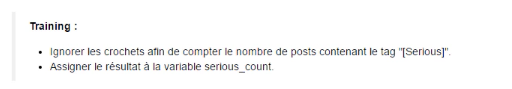

In [18]:
regex = "\[Serious\]"
serious_count = 0
for post in posts:
    for value in post:
        if re.search(regex, value) is not None:
            serious_count += 1
print(serious_count)

69


## Améliorer notre regex

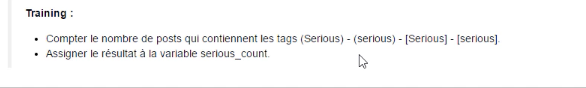

In [20]:
regex = "[\[\(][Ss]erious[\]\)]"
serious_count = 0
for post in posts:
    for value in post:
        if re.search(regex, value) is not None:
            serious_count += 1
print(serious_count)

80


In [21]:
# combiner
# |

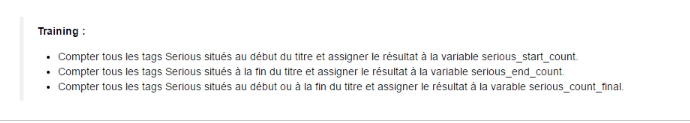

In [28]:
regex1 = "^[\[\(][Ss]erious[\]\)]"
regex2 = "[\[\(][Ss]erious[\]\)]$"
regex3 = "^[\[\(][Ss]erious[\]\)]|[\[\(][Ss]erious[\]\)]$"
serious_start_count = 0
serious_end_count = 0
serious_count_final = 0
for post in posts:
    if re.search(regex1, post[0]) is not None:
        serious_start_count += 1
        #serious_count_final +=1
    elif re.search(regex2, post[0]) is not None:
        serious_end_count += 1
        #serious_count_final +=1
    if re.search(regex3, post[0]) is not None:
        serious_count_final +=1
print(serious_start_count)
print(serious_end_count)
print(serious_count_final)

69
11
80


## Modifier des chaines de caractères avec regex

In [ ]:
# sub(regex, string qui remplace la regex, chaine à remplacer)

re.sub("yo", "hello", "yo world")

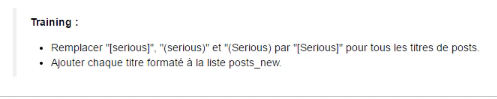

In [33]:
posts_new = []
regex = "[\[\(][Ss]erious[\]\)]"
for post in posts:
    if re.search(regex, post[0]) is not None:
        posts_new.append(post[0])
        re.sub(regex, "[Serious]", post[0])
print(posts)

[['What\'s your internet "white whale", something you\'ve been searching for years to find with no luck?', '11510', '1433213314.0', '1', '26195'], ["What's your favorite video that is 10 seconds or less?", '8656', '1434205517.0', '4', '8479'], ['What are some interesting tests you can take to find out about yourself?', '8480', '1443409636.0', '1', '4055'], ["PhD's of Reddit. What is a dumbed down summary of your thesis?", '7927', '1440188623.0', '0', '13201'], ['What is cool to be good at, yet uncool to be REALLY good at?', '7711', '1440082910.0', '0', '20325'], ['[Serious] Redditors currently in a relationship, besides dinner and a movie, what are your favorite activities for date night?', '7598', '1439993280.0', '2', '5389'], ["Parents of Reddit, what's something that your kid has done that you pretended to be angry about but secretly impressed or amused you?", '7553', '1439161809.0', '0', '11520'], ['What is a good subreddit to binge read the All Time Top Posts of?', '7498', '143882

## Matcher les années avec regex

In [34]:
# un 1 ou 2 puis 3 nombres entre 0 et 9
# [1-2][0-9]{3}

In [38]:
year_string = []
for post in posts:
    for value in post:
        if re.search("^[1-2][0-9]{3}$", value) is not None:
            year_string.append(value)
print(year_string)

['2780', '1348', '2477', '1058', '2900', '1658', '2221', '2525', '2897', '1468', '2798', '1804', '2877', '2221', '2829', '1621', '2798', '1659', '2315', '1114', '2189', '2544', '1066', '2371', '1343', '2437', '2473', '2258', '2080', '2352', '1515', '2512', '2844', '2584', '2345', '2102', '2296', '2714', '1805', '2462', '2481', '2456', '1976', '1094', '2690']


## Extraire toutes les années

In [39]:
# findall()

re.findall("[a-z]", "abc123")

['a', 'b', 'c']

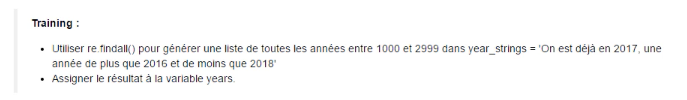

In [40]:
string_years = "On est déjà en 2017,une année de plus que 2016 et de moins que 2018"
re.findall("[1-2][0-9]{3}",string_years)

['2017', '2016', '2018']